# Q1(i)

Visualising the first image: 


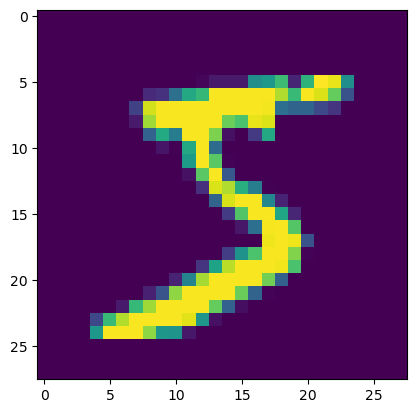

Showing the top 5 principal components visualised: 


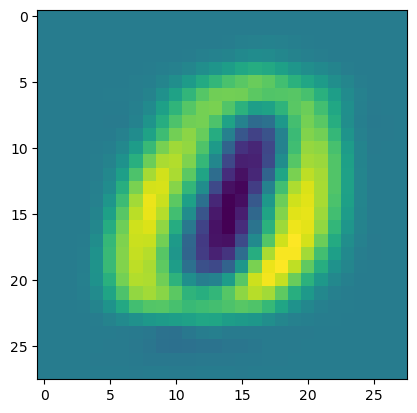

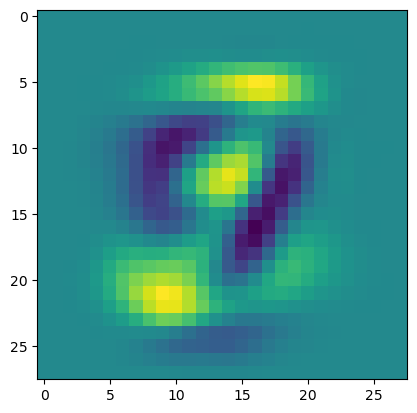

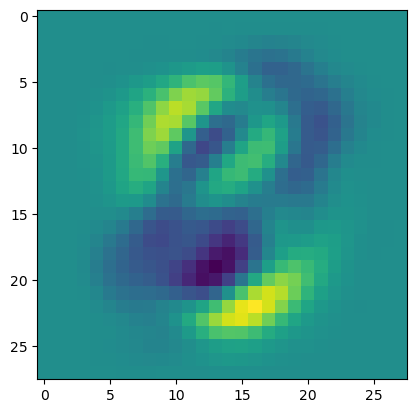

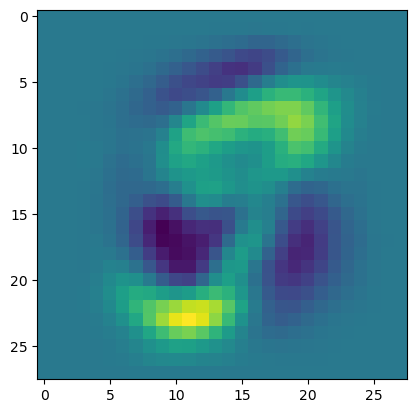

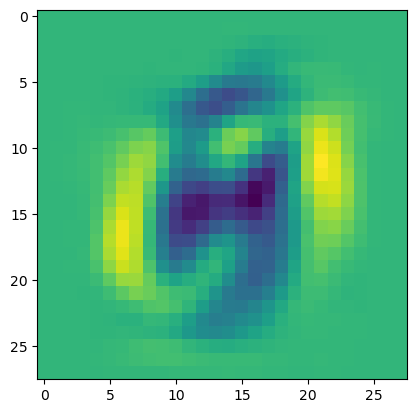

The variance of the data along the top 10 principal components: 
[337127.28946546203, 249954.557913256, 219688.56723807723, 187483.52039853332, 165498.9239832566, 154108.93690834357, 114411.19904430327, 100628.2990793741, 97375.1431373693, 77795.57503974717]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from PIL import Image

def getEvalsEvecs(C):
  evals, evecs = np.linalg.eigh(C)
  # print(evals[:20],"...",evals[-20:])
  # print(evecs)

  evecs = np.transpose(evecs)

  lenn = len(evals)
  f_evals = []
  f_evecs = []

  for i in range(lenn):
    if(evals[lenn-1-i]>0):
      f_evals.append(evals[lenn-1-i])
      f_evecs.append(evecs[lenn-1-i])
    else:
      break

#   print(f_evals[:20],"...",f_evals[-20:])
#   print(len(f_evals))

  return f_evals, f_evecs

df = pd.read_csv("mnist_train.csv")

n_samples = 3000
n_features = 784
data = np.array(df.iloc[:n_samples,:])

labels = np.zeros((n_samples,))
images = np.zeros((n_samples,n_features))
for i in range(len(data)):
    labels[i] = data[i][0]
    images[i] = data[i][1:]

print("Visualising the first image: ")
img = np.array(images[0].reshape(28,28))
plt.imshow(img)
plt.show(block=False)

X = images
mu = np.mean(X,axis=0)
centX = X - mu

C = (1/n_samples)*np.matmul(np.transpose(centX),centX)

f_evals, f_evecs = getEvalsEvecs(C)

print("Showing the top 5 principal components visualised: ")
for i in range(5):
  img = f_evecs[i].reshape(28,28)
  plt.imshow(img)
  plt.show(block=False)

print("The variance of the data along the top 10 principal components: ")
print(f_evals[:10])

# Q1(ii)

Showing the first 10 datapoints represented using only 70 principal components: 


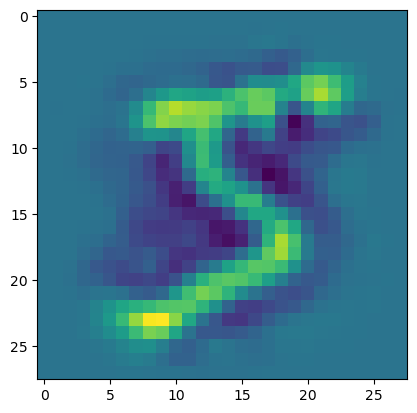

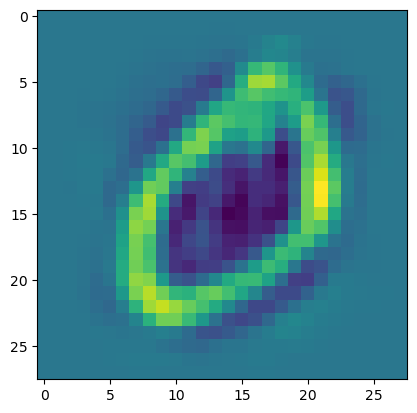

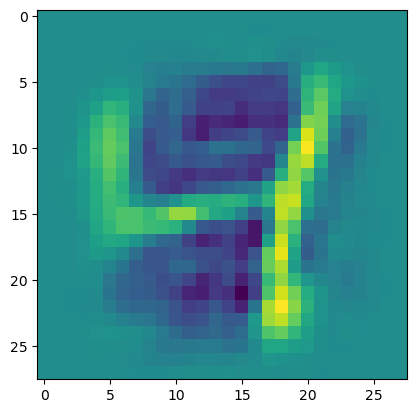

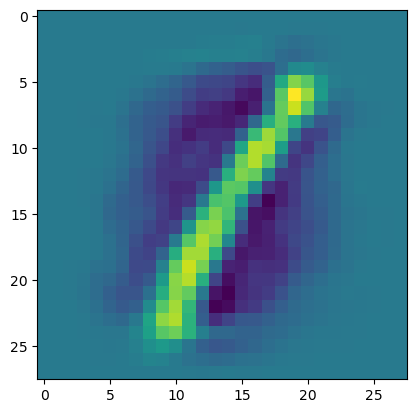

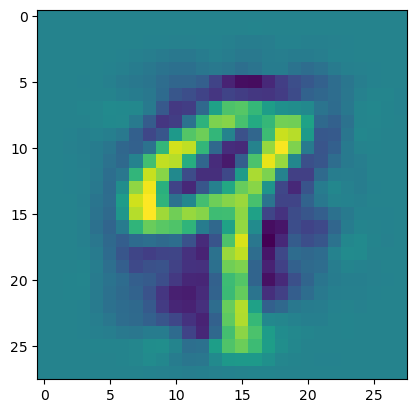

In [4]:
print("Showing the first 10 datapoints represented using only 70 principal components: ")

d = 70
for i in range(5):
  xi_est = np.zeros((784,))
  for j in range(d):
    xi_proxy = np.dot(centX[i],f_evecs[j])
    xi_est += xi_proxy*f_evecs[j]
  xi_est = xi_est.reshape(28,28)
  plt.imshow(xi_est)
  plt.show(block=False)

# Q1(iii)

Showing scatterplot of top two principal components for polynomial kernel of k = 2
Done getting evals, evecs
1.0000000000000002
Populated x_sc and y_sc, getting ready to plot...


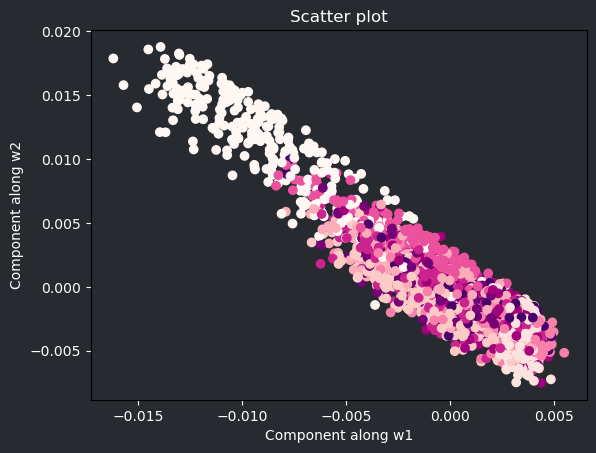

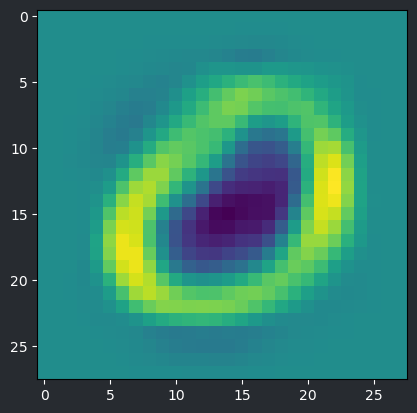

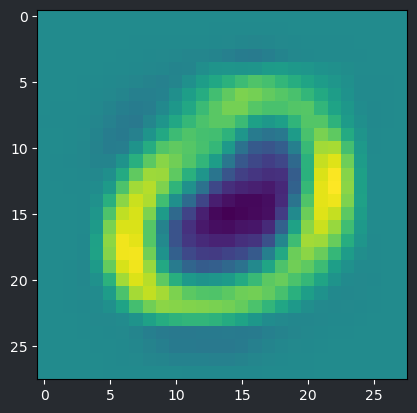

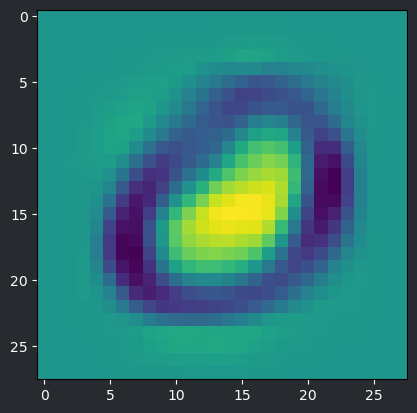

Showing scatterplot of top two principal components for polynomial kernel of k = 3
Done getting evals, evecs
0.9999999999999999
Populated x_sc and y_sc, getting ready to plot...


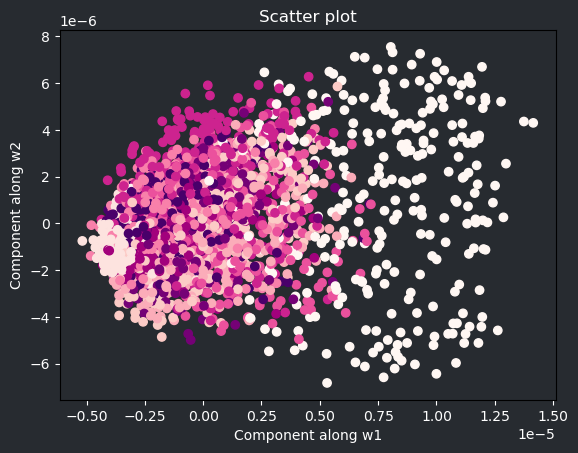

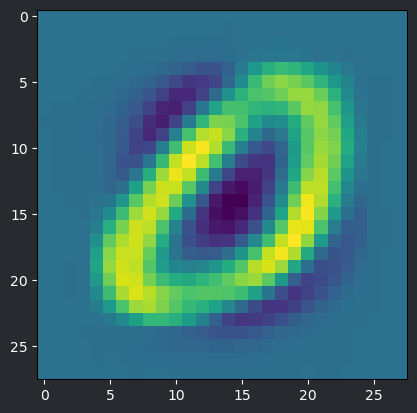

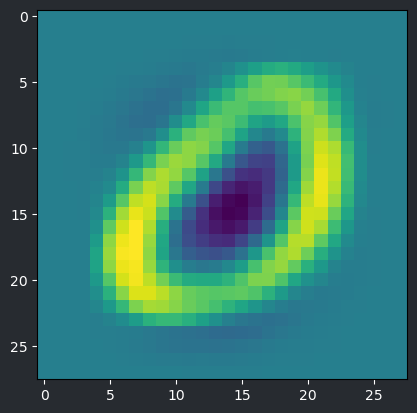

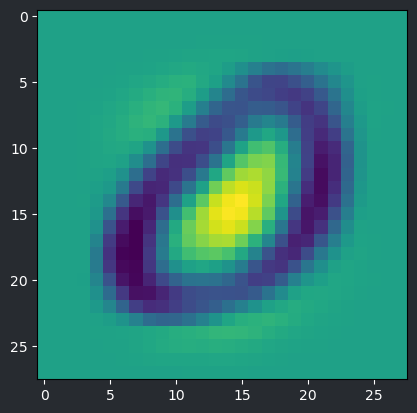

Showing scatterplot of top two principal components for polynomial kernel of k = 4
Done getting evals, evecs
1.0000000000000027
Populated x_sc and y_sc, getting ready to plot...


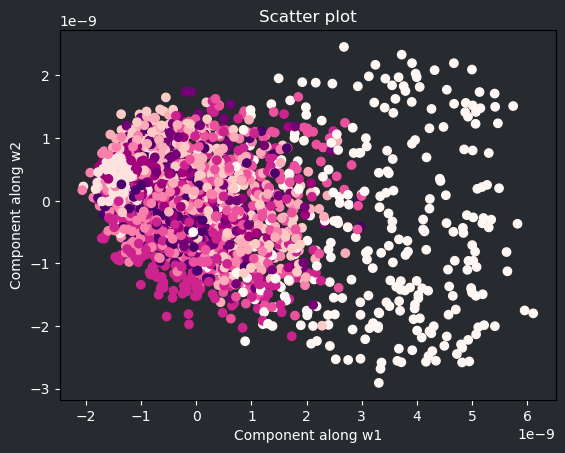

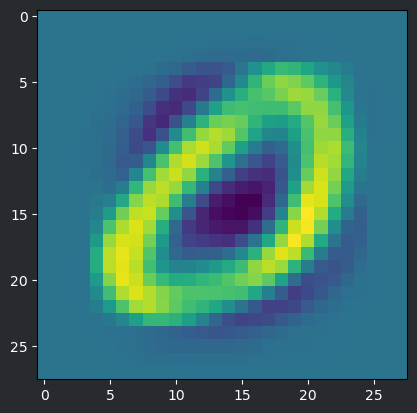

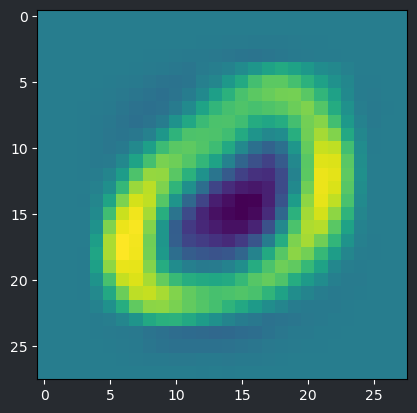

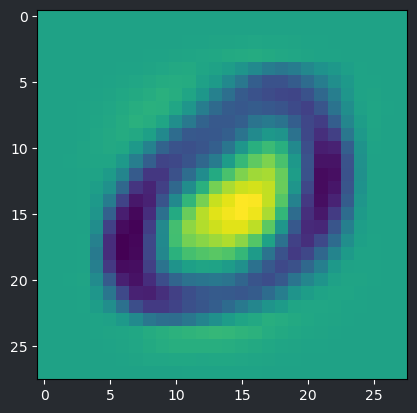

Showing scatterplot of top two principal components for RBF kernel of sigma = 0.1
Done getting evals, evecs
1.0
Populated x_sc and y_sc, getting ready to plot...


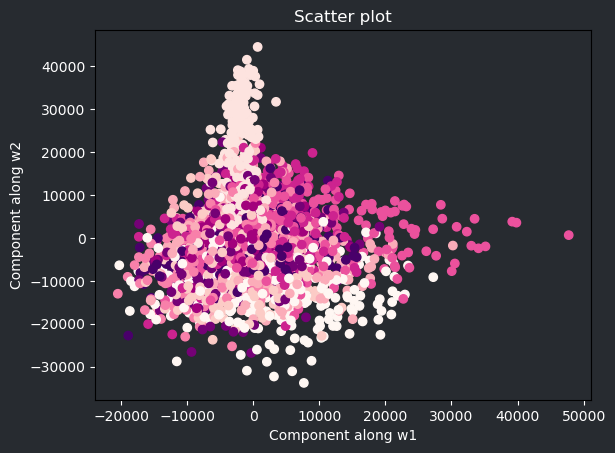

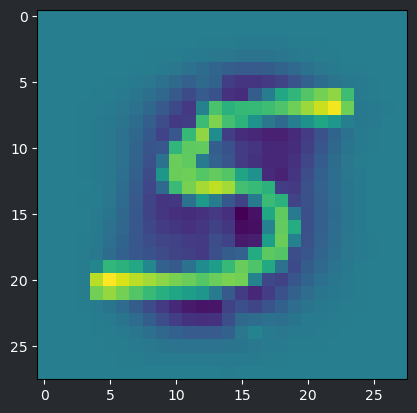

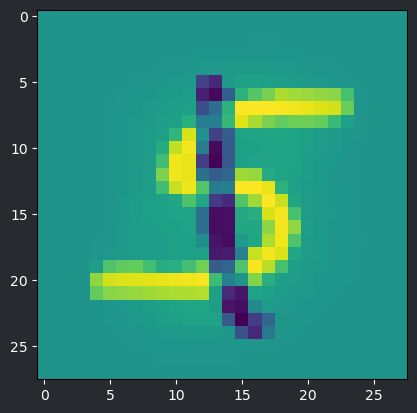

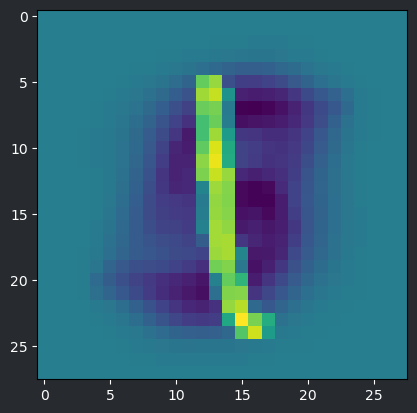

Showing scatterplot of top two principal components for RBF kernel of sigma = 0.2
Done getting evals, evecs
1.0
Populated x_sc and y_sc, getting ready to plot...


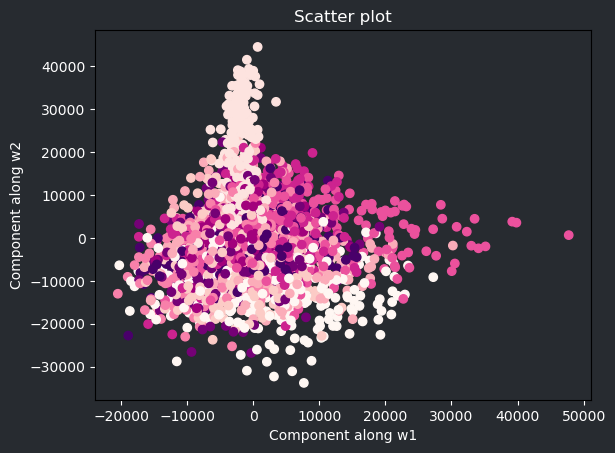

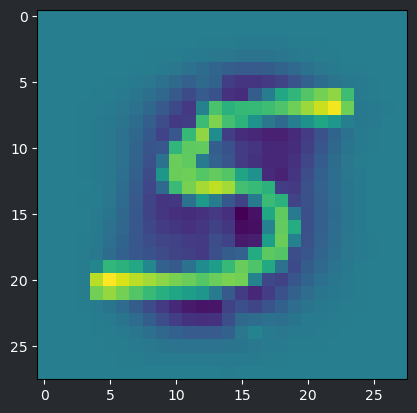

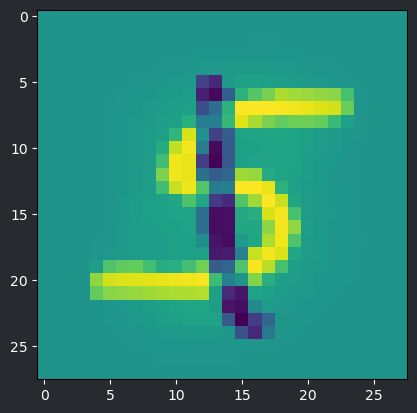

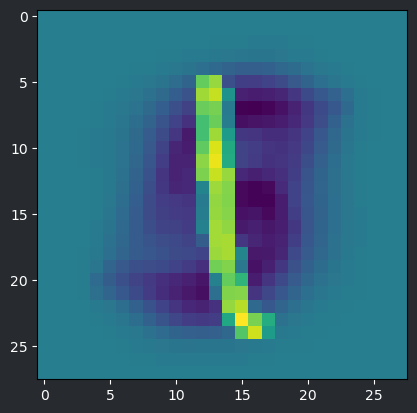

Showing scatterplot of top two principal components for RBF kernel of sigma = 0.30000000000000004
Done getting evals, evecs
1.0
Populated x_sc and y_sc, getting ready to plot...


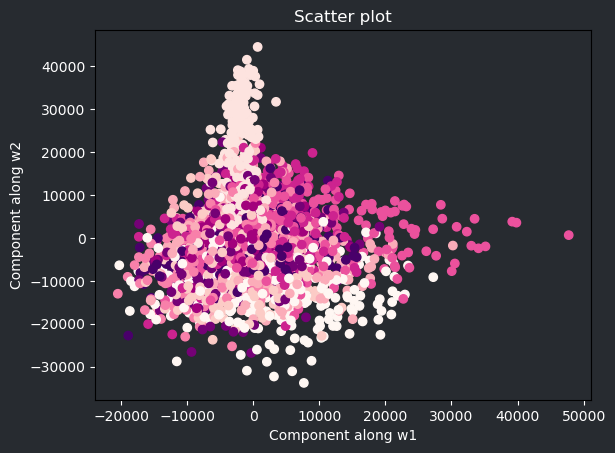

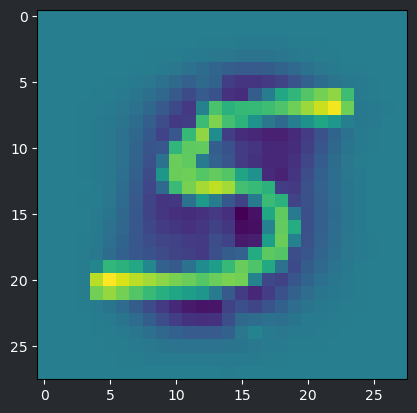

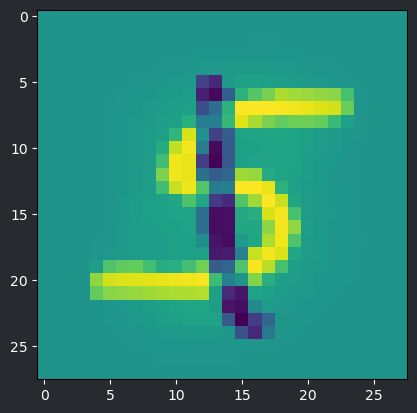

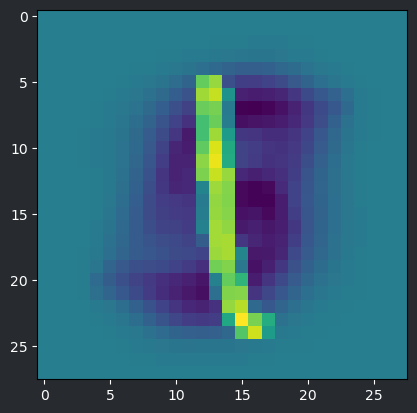

Showing scatterplot of top two principal components for RBF kernel of sigma = 0.4
Done getting evals, evecs
1.0
Populated x_sc and y_sc, getting ready to plot...


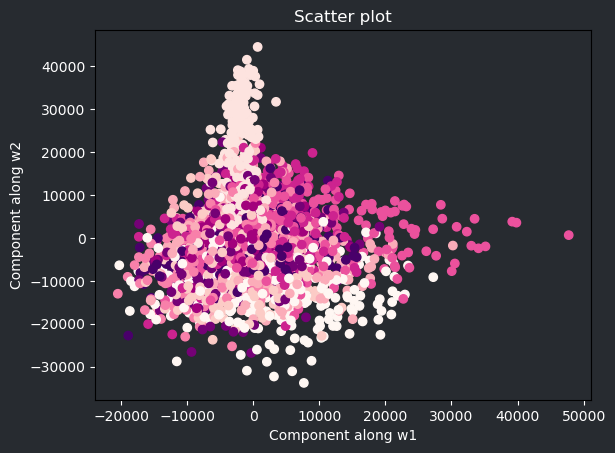

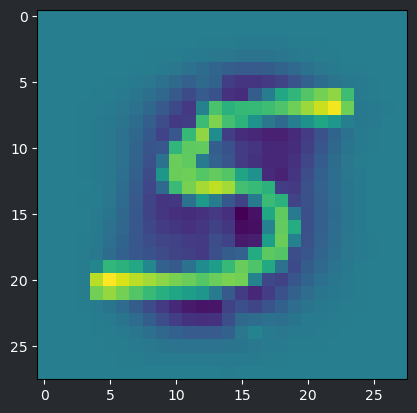

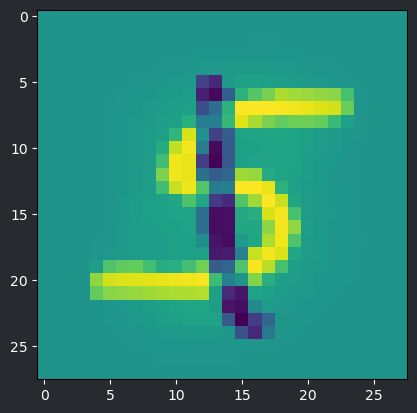

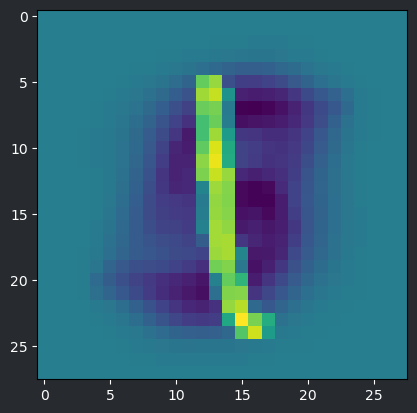

Showing scatterplot of top two principal components for RBF kernel of sigma = 0.5
Done getting evals, evecs
1.0
Populated x_sc and y_sc, getting ready to plot...


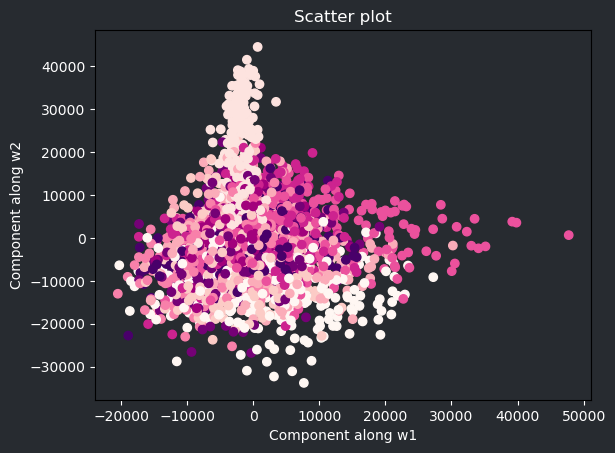

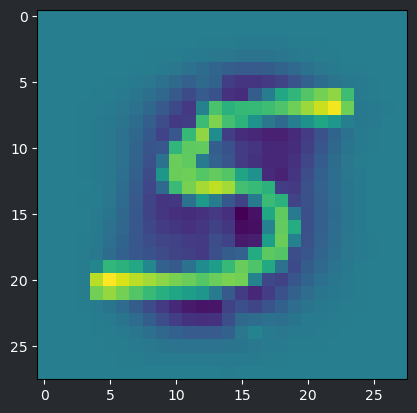

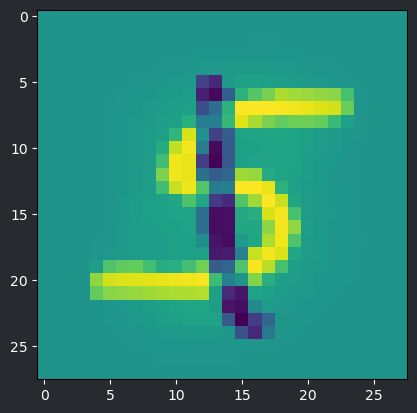

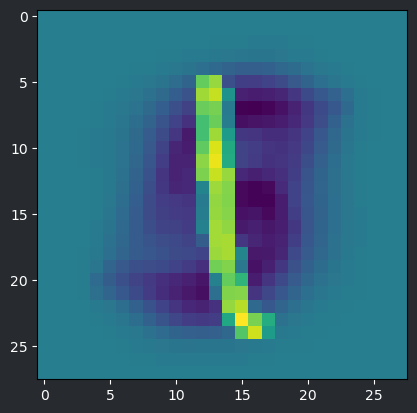

Showing scatterplot of top two principal components for RBF kernel of sigma = 0.6000000000000001
Done getting evals, evecs
1.0
Populated x_sc and y_sc, getting ready to plot...


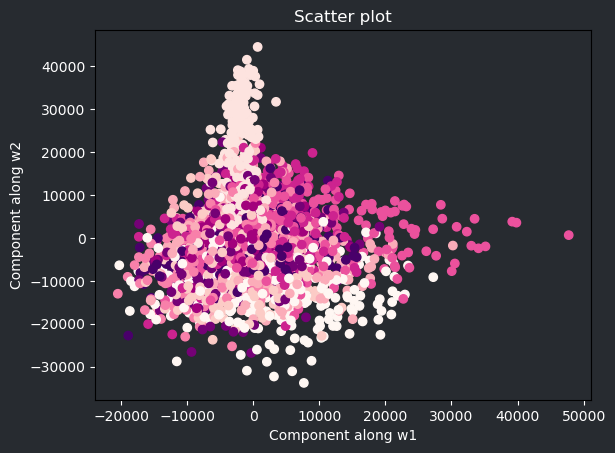

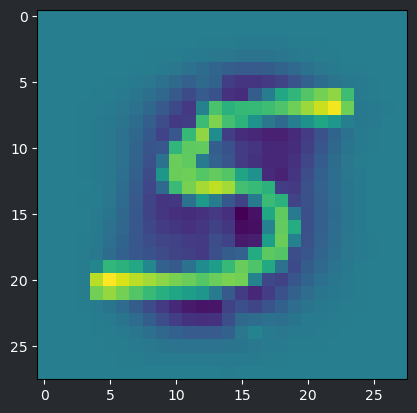

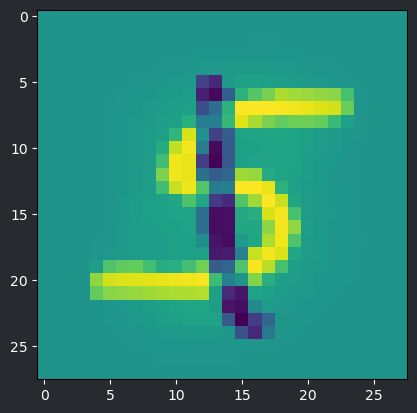

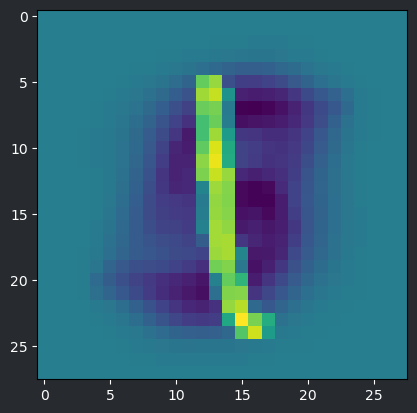

Showing scatterplot of top two principal components for RBF kernel of sigma = 0.7000000000000001
Done getting evals, evecs
1.0
Populated x_sc and y_sc, getting ready to plot...


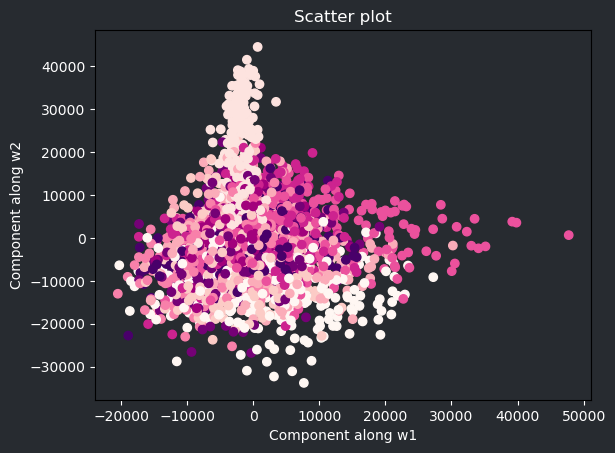

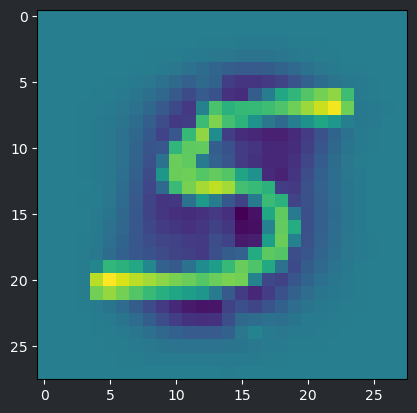

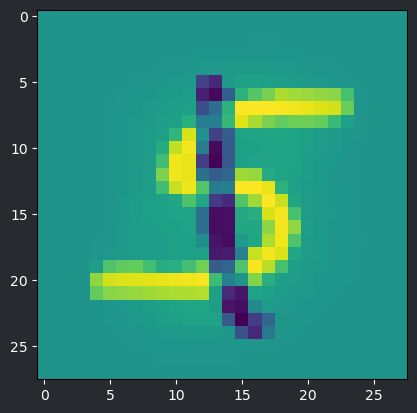

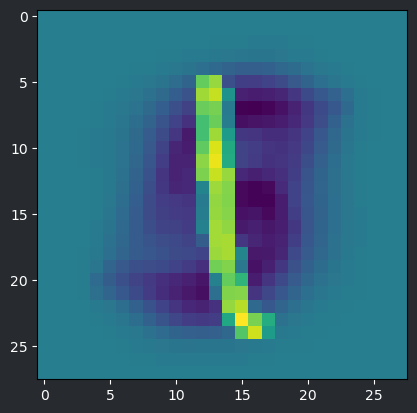

Showing scatterplot of top two principal components for RBF kernel of sigma = 0.8
Done getting evals, evecs
1.0
Populated x_sc and y_sc, getting ready to plot...


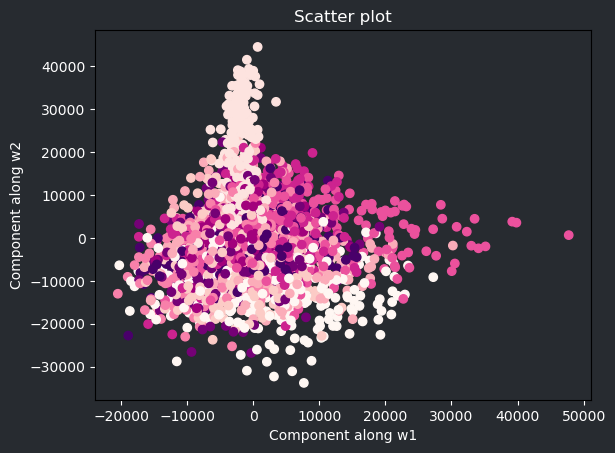

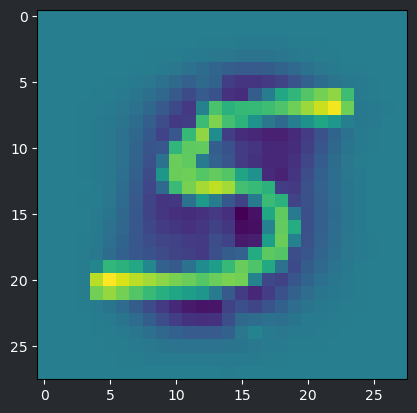

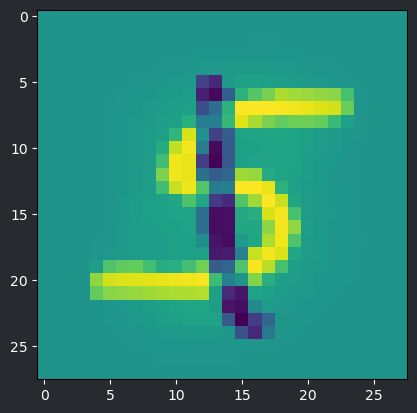

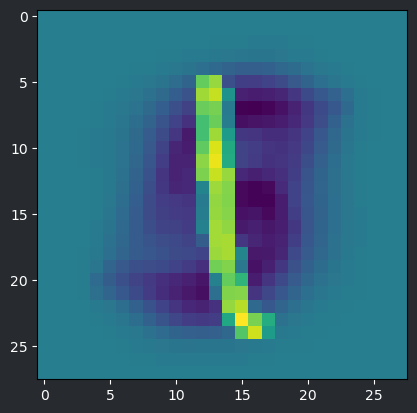

Showing scatterplot of top two principal components for RBF kernel of sigma = 0.9
Done getting evals, evecs
1.0
Populated x_sc and y_sc, getting ready to plot...


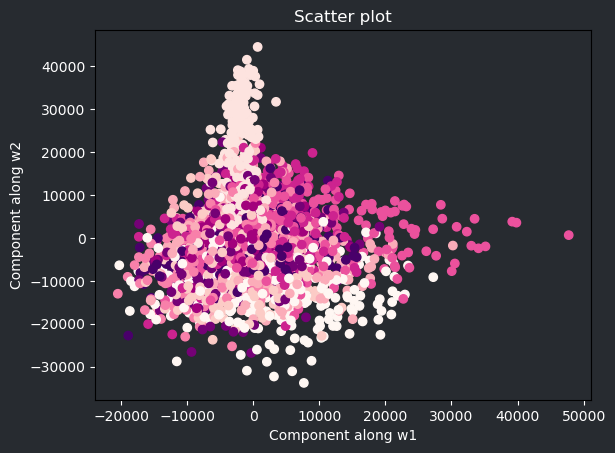

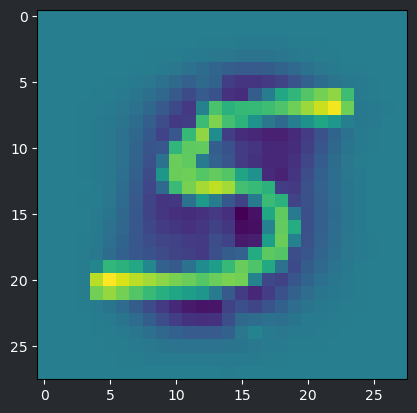

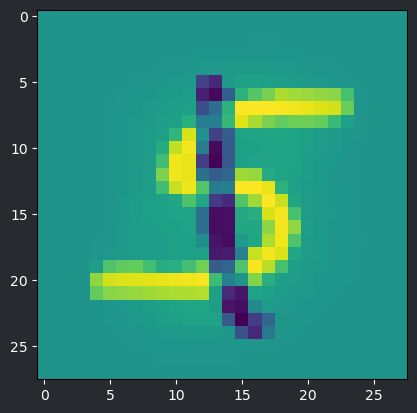

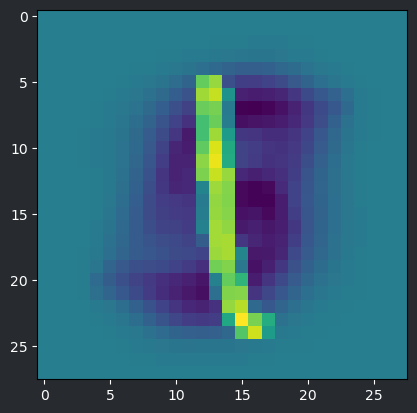

Showing scatterplot of top two principal components for RBF kernel of sigma = 1.0
Done getting evals, evecs
1.0
Populated x_sc and y_sc, getting ready to plot...


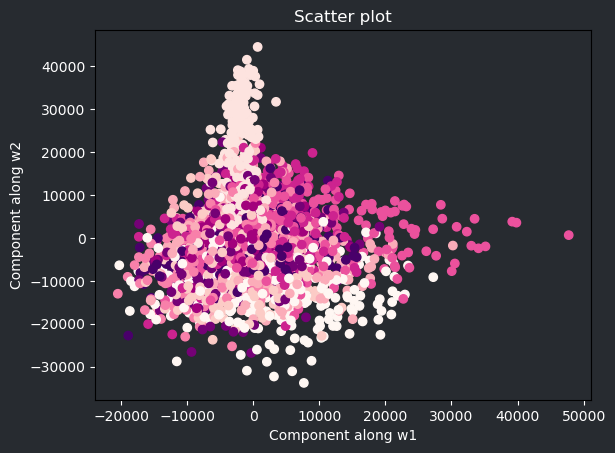

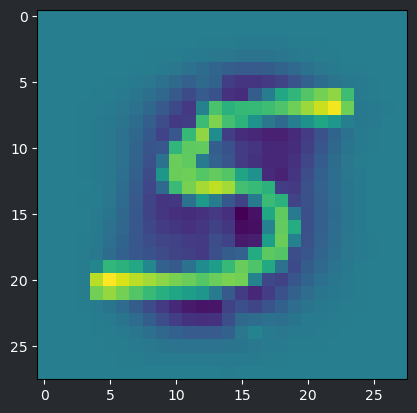

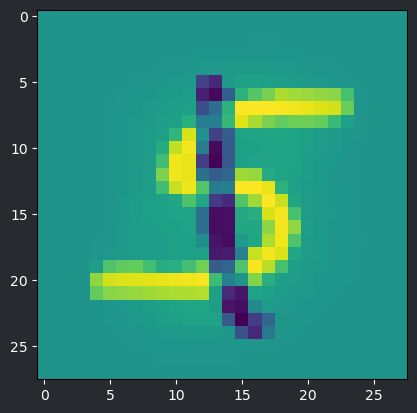

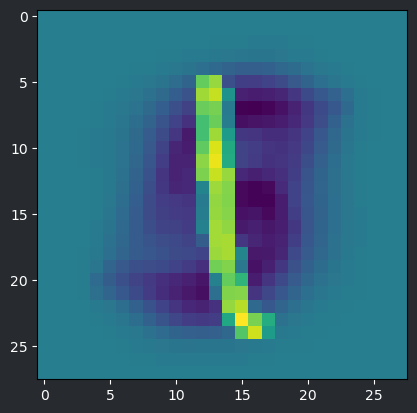

In [5]:
import math
def polyKernel(x,p):
  n = len(x)
  K = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      K[i][j] = math.pow((1+np.dot(x[i],x[j])),p)
  
  return K

def rbfKernel(x,s):
  n = len(x)
  K = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      K[i][j] = math.exp(-1*np.dot(x[i]-x[j],x[i]-x[j])/(2*s**2))
  
  return K

def plotTop2Components(x,labels,K):
  k_vals, k_vecs = getEvalsEvecs(K)
  print("Done getting evals, evecs")
  b1 = k_vecs[0]
  print(np.dot(b1,b1))
  b2 = k_vecs[1]
  a1 = b1/math.sqrt(len(K)*k_vals[0])
  a2 = b2/math.sqrt(len(K)*k_vals[1])
  w1 = np.matmul(np.transpose(x),a1)
  w2 = np.matmul(np.transpose(x),a2)

  x_sc = np.zeros((len(K),))
  y_sc = np.zeros((len(K),))

  for i in range(len(K)):
    x_sc[i] = np.dot(x[i],w1)
    y_sc[i] = np.dot(x[i],w2)
  
  plt.rcParams['axes.facecolor'] = '#272b30'
  plt.rcParams['figure.facecolor'] = '#272b30'
  plt.rcParams['savefig.facecolor'] = '#272b30'
  plt.rcParams['xtick.color'] = 'white'
  plt.rcParams['ytick.color'] = 'white'
  plt.rcParams['axes.labelcolor'] = 'white'
  plt.rcParams['text.color'] = 'white'

  cmap = plt.cm.get_cmap('RdPu', 10)

  print("Populated x_sc and y_sc, getting ready to plot...")

  plt.scatter(x_sc,y_sc,c=labels,cmap=cmap)
  plt.xlabel("Component along w1")
  plt.ylabel("Component along w2")
  plt.title("Scatter plot")

  plt.show(block=False)

  for j in range(3):
    img = x_sc[j]*w1 + y_sc[j]*w2
    img = img.reshape(28,28)
    plt.imshow(img)
    plt.show(block=False)

for i in range(2,5):
    print("Showing scatterplot of top two principal components for polynomial kernel of k =",i)
    plotTop2Components(centX,labels,polyKernel(centX,i))

for i in range(1,11):
    print("Showing scatterplot of top two principal components for RBF kernel of sigma =",i*0.1)
    plotTop2Components(centX,labels,rbfKernel(centX,0.1*i))
